## Deep Neural Network - Classification

The data set (housing.csv) includes information about houses in each district in California. Predict the ocean proximity (`ocean_proximity` column) in the data set. This column determines whether the district is inland, near ocean, etc. This is a multi-class classification task. 

**The unit of analysis is a DISTRICT**



## Goal

Use the **housing.csv** data set and build the below models to predict **ocean_proximity**. 

# Read and Prepare the Data

In [1]:
# Importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
# Check for missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         5
dtype: int64

The data has missing values in the columns total bedrooms and ocean proximity. Since the dataset has 20635 records and we have only 207 missing values we can delete these records instead of replacing with other values.

In [4]:
# Delete missing values
housing.dropna(axis=0, inplace=True)
# Reset Index
housing.reset_index(inplace=True, drop=True)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,-119.570986,35.633778,28.629724,2636.764147,537.899305,1425.132220,499.488007,3.871437,206821.928432
std,2.003732,2.136312,12.590156,2185.451409,421.425970,1133.277418,382.326831,1.899432,115412.337452
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.563400,119475.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.537500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.250000,647.000000,1723.000000,604.000000,4.744075,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Analysis

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: ocean_proximity, dtype: int64

The target column ocean_proximity(district) has 4 different classes.

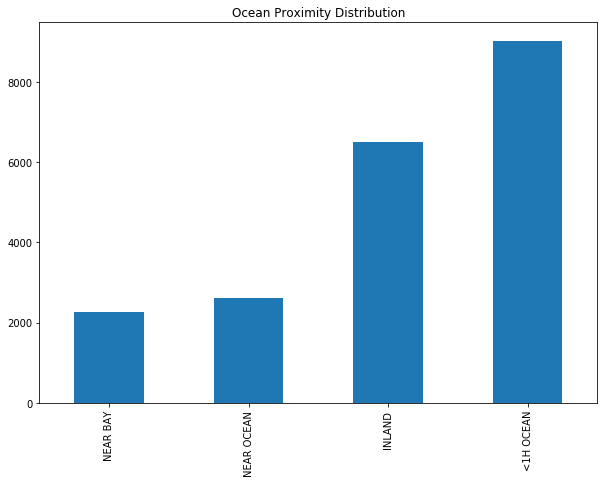

In [6]:
housing['ocean_proximity'].value_counts().sort_values().plot(kind='bar',figsize=(10,7))
plt.title("Ocean Proximity Distribution")
plt.show()

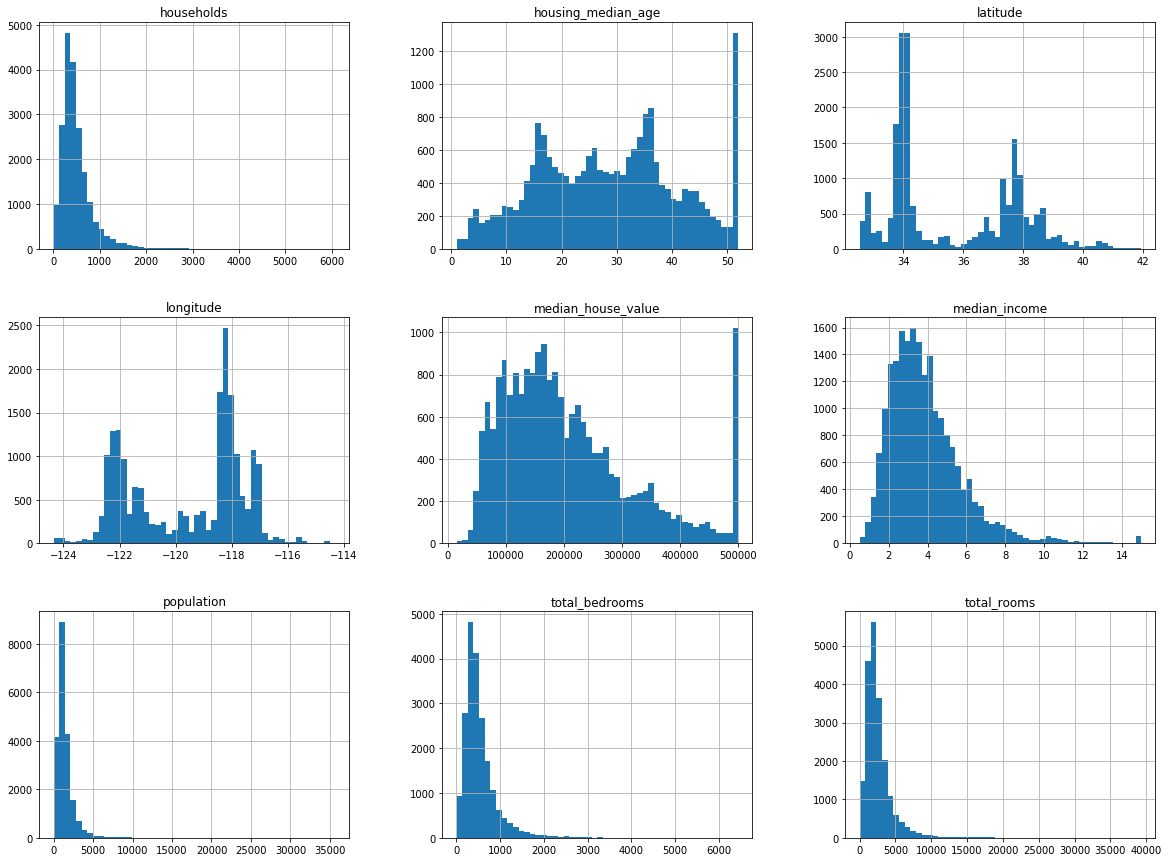

In [7]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Transform variable(s)

Transform at least one variable. For example, you can transform an existing variable (such as using a log transformation), or create a new variable from two existing variables.

__The values given in the columns total bedrooms, total rooms and total population is for entire district. These values calculated for each household will have more significance in predicting the ocean proximity. So I have created the below 3 variables.__

In [8]:
housing['rooms_household'] = housing['total_rooms']/housing['households']
housing['bedrooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_household'] = housing['population']/housing['households']

In [9]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_household', 'bedrooms',
       'population_household'],
      dtype='object')

### Prepare test and train data

In [10]:
#Set the training and test data sets
housing_X = housing.drop(["ocean_proximity","total_bedrooms","total_rooms","population"], axis=1) # drop labels 

housing_y = housing["ocean_proximity"]
# Ordinal Encoder requires a 2-D array so we created a dataframe of target 
# Dataframe --> numpy array -->
housing_y_nn = housing[["ocean_proximity"]]

Since training data has transformed variables of rooms, bedrooms and population the variables total_bedrooms, total_rooms and population are removed from the dataset.

In [11]:
housing_X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'median_house_value', 'rooms_household', 'bedrooms',
       'population_household'],
      dtype='object')

### Standardise the numerical columns

__For neural networks it is important that all features be on the same scale. So I have standardised numerical features.__

In [12]:
# Standardise the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_X_std = scaler.fit_transform(housing_X)

### Encode the target variable

__Ordinal encoding maps each unique label to an integer value.The function encode_target will convert the output variable ocean_proximity to numeric format.__

In [13]:
# Encoding the target variable
from sklearn.preprocessing import OrdinalEncoder
def encode_target(y_train, y_test):
    ordinal_encoder = OrdinalEncoder()
    ordinal_encoder.fit(y_train)
    y_train_encoded = ordinal_encoder.transform(y_train)
    y_test_encoded = ordinal_encoder.transform(y_test)
    y_train_new = y_train_encoded.astype(int)
    y_test_new = y_test_encoded.astype(int)
    return y_train_new, y_test_new

# DNNClassifier model

Use Tensorflow's DNNClassifier to predict the target variable. You can try deep networks.

In [14]:
import tensorflow as tf

In [15]:
from sklearn.model_selection import train_test_split
# Split the data in to 70:30 for train and test
X_train, X_test, y_train, y_test = train_test_split(housing_X_std, housing_y_nn,random_state=42, test_size=0.3)

### Prepare the data for the model

Call the function encode_target to encode the target variable, ocean proximity. The encoded data is again converted to one-dimensional array.

In [16]:
y_train_enc,y_test_enc = encode_target(y_train,y_test)

In [17]:
#Convert the encoded target data in to a 1-D array using ravel
y_train_1D = np.ravel(y_train_enc)
y_test_1D = np.ravel(y_test_enc)
# convert the X_train and X_test to dataframes
X_train_df = pd.DataFrame(X_train, columns=housing_X.columns)
X_test_df = pd.DataFrame(X_test, columns=housing_X.columns)

#### __Converting all the numeric columns to dense tensors.__

In [18]:
feat_columns = [tf.feature_column.numeric_column(key = column) for column in housing_X.columns]

In [19]:
feat_columns

[NumericColumn(key='longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='housing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='households', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='median_house_value', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='rooms_household', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='population_household', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

### __Input function for training and evaluation__
<br>
        To create the input function we will have to convert the inputs to dataset.
        Evaluate input function uses train data and validation input function uses the test data.

In [20]:
#Read data from tensor into memory

def training_input_fn ():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_train_df), y_train_1D))
    dataset = dataset.shuffle(500).repeat().batch(100)
    dataset_iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)   
    return dataset_iterator.get_next()

# create testing input function
def valid_input_fn ():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_test_df), y_test_1D))
    dataset = dataset.batch(100)
    dataset_iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)
    return dataset_iterator.get_next()

DNN classifier is created with 3 hidden layers. First layer with 50 units, second with 25 units and last layer with 10 units. With adam optimizer and activation function elu.

### Define the model

In [21]:
adam= tf.keras.optimizers.SGD(learning_rate = 0.1)
#AdamOptimizer(learning_rate=0.01)
dnn_clf = tf.estimator.DNNClassifier(hidden_units = [50, 25, 10], 
                                     n_classes = 4, 
                                     feature_columns = feat_columns,
                                     optimizer = adam,
                                     activation_fn = tf.nn.elu) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/p1/x5tn1wf944s0t3kd0c3p8l8m0000gp/T/tmphc5scqvf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### __Train the model__

In [22]:
dnn_clf.train(input_fn = lambda:training_input_fn(),steps=10000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint list

INFO:tensorflow:loss = 0.14820005, step = 6300 (0.113 sec)
INFO:tensorflow:global_step/sec: 791.326
INFO:tensorflow:loss = 0.22702093, step = 6400 (0.126 sec)
INFO:tensorflow:global_step/sec: 806.844
INFO:tensorflow:loss = 0.18421365, step = 6500 (0.124 sec)
INFO:tensorflow:global_step/sec: 721.261
INFO:tensorflow:loss = 0.15059952, step = 6600 (0.139 sec)
INFO:tensorflow:global_step/sec: 731.834
INFO:tensorflow:loss = 0.19851229, step = 6700 (0.137 sec)
INFO:tensorflow:global_step/sec: 773.078
INFO:tensorflow:loss = 0.16240458, step = 6800 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.675
INFO:tensorflow:loss = 0.26744363, step = 6900 (0.130 sec)
INFO:tensorflow:global_step/sec: 760.207
INFO:tensorflow:loss = 0.1809246, step = 7000 (0.132 sec)
INFO:tensorflow:global_step/sec: 829.717
INFO:tensorflow:loss = 0.20789063, step = 7100 (0.120 sec)
INFO:tensorflow:global_step/sec: 843.037
INFO:tensorflow:loss = 0.22346632, step = 7200 (0.119 sec)
INFO:tensorflow:global_step/sec: 901.939
I

In [23]:
y_train_pred = list(dnn_clf.predict(input_fn = valid_input_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/p1/x5tn1wf944s0t3kd0c3p8l8m0000gp/T/tmphc5scqvf/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [24]:
predictions = [p['class_ids'][0] for p in y_train_pred]

In [25]:
list(predictions[:10]), y_test_1D[:10]

([1, 0, 1, 1, 0, 1, 0, 1, 0, 2], array([1, 0, 1, 1, 0, 1, 0, 1, 0, 2]))

### __Evaluate the Model__

In [26]:
dnn_clf.evaluate(input_fn = lambda:valid_input_fn())

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-15T15:18:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/p1/x5tn1wf944s0t3kd0c3p8l8m0000gp/T/tmphc5scqvf/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40346s
INFO:tensorflow:Finished evaluation at 2020-07-15-15:18:02
INFO:tensorflow:Saving dict for gl

{'accuracy': 0.92967856,
 'average_loss': 0.16544968,
 'loss': 0.16423671,
 'global_step': 10000}

# Keras DNN model

Use Tensorflow's Keras library to predict the same target variable. 

In [27]:
# Importing Keras libraries
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### Prepare data for the model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(housing_X_std, housing_y_nn,random_state=42, test_size=0.3)

__Keras requires all input and output variables in numeric format. Function encode_target will encode test and train datasets of the target data.__

In [29]:
y_train_enc,y_test_enc = encode_target(y_train,y_test)

### Define the model

- output layer should have 4 nodes and the __activation function__ is softmax, to ensure that output values are in the range of 0-1. For the other layers Relu is tha activation function
- The __loss function__ should be "categorical_crossentropy" for a multiclass classification, Here we have used 'sparse_categorical_crossentropy' as the target variable is ordinal.
- The __optimizer__ function is sgd, Stochastic Gradient. This algorithm minimizes the loss function in the quickest way possible.

In [30]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(4, activation='softmax'))

# Compile model
sgd = keras.optimizers.SGD(lr=0.05)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Fit and evaluate the model

In [31]:
model.fit(X_train, y_train_enc, epochs=100, batch_size=100)

Epoch 1/100
143/143 [==============================] - 0s 769us/step - loss: 0.9360 - accuracy: 0.6569
Epoch 2/100
143/143 [==============================] - 0s 654us/step - loss: 0.6586 - accuracy: 0.7596
Epoch 3/100
143/143 [==============================] - 0s 634us/step - loss: 0.5799 - accuracy: 0.7855
Epoch 4/100
143/143 [==============================] - 0s 647us/step - loss: 0.5295 - accuracy: 0.7947
Epoch 5/100
143/143 [==============================] - 0s 634us/step - loss: 0.4707 - accuracy: 0.8055
Epoch 6/100
143/143 [==============================] - 0s 633us/step - loss: 0.4102 - accuracy: 0.8345
Epoch 7/100
143/143 [==============================] - 0s 648us/step - loss: 0.3657 - accuracy: 0.8512
Epoch 8/100
143/143 [==============================] - 0s 640us/step - loss: 0.3496 - accuracy: 0.8557
Epoch 9/100
143/143 [==============================] - 0s 647us/step - loss: 0.3404 - accuracy: 0.8615
Epoch 10/100
143/143 [==============================] - 0s 632us/step - l

In [32]:
# evaluate the model
score = model.evaluate(X_test, y_test_enc)
print(score[1]*100)

192/192 [==============================] - 0s 559us/step - loss: 0.2018 - accuracy: 0.9336
93.35944056510925


# MLPClassifier (for comparison purposes)

Use the MLPClassifier from the Sci-kit Learn library and predict the same target variable.

### split data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(housing_X_std, housing_y, random_state=42, test_size=0.3)

In [34]:
X_train.shape, X_test.shape

((14299, 9), (6129, 9))

### Define the model

In [35]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [36]:
y_test_pred = mlp_clf.predict(X_test)
X_train_pred = mlp_clf.predict(X_train)

### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[2506,   54,    7,  114],
       [  73, 1900,    8,    0],
       [  33,    6,  611,   11],
       [  94,    1,   21,  690]])

The MLP classifier model has the similar precision recall and F1 score of about 93%.High precision relates the low false positive rate. Recall relates to the high true positive rate. The recall and precision for our model of suggest that model is good.

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
p = precision_score(y_test, y_test_pred, average='weighted')
print('Precision',p)
r = recall_score(y_test, y_test_pred, average='weighted')
print('Recall',r)
f_score = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score',f_score)

Precision 0.9314450974670504
Recall 0.9311470060368738
F1 score 0.9312642705072262


### Accuracy Metrics

In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy of model on Test dataset",accuracy_score(y_test, y_test_pred))
print("Accuracy of model on Train dataset",accuracy_score(y_train, X_train_pred))

Accuracy of model on Test dataset 0.9311470060368738
Accuracy of model on Train dataset 0.9475487796349396


# Discussion

Provide an executive summary of your work. In your summary, discuss your model building approach, your results, and the best model. Compare and contrast the three models you built. Also, address any issues of overfitting, etc. if applicable.

- My approach in building these models has begun in understanding the data in depth by performing some exploratory analysis. I worked on few visualizations to better understand the data. This has helped me to create 3 transformed variables that can improve the model. I analysed the benefits that this model could provide to real-world business requirements and developed it efficiently. I preprocessed the data to fit and train the ML models. I tried to increase the accuracy by modifying the parameters such as optimizer, learning rate, activation funtion, number of layers etc.

- The accuracy of all the three models was almost similar and it is around 92% - 94%.
    - DNN classifier model has an accuracy of 93% and loss of 0.15 on test data and loss 0.19 on test data
    - Keras DNN classifier has an accuracy 93.6%, loss 0.15 on train data and an accuracy of 92.5% and loss of 0.17 on test data.
    - MLP classifier has an accuracy of 94% on train data and 93% on test data. 
    
- Comparing the three models MLP classifier has little higher accuarcy than the other two models. But since the difference is not very high all the models are equally good in predicting the district. 

- There is only a minor difference between the test and train accuracies which suggest us that there are no issues of overfitting or underfitting. In case of such issue we have avoid those with regularizations, early stopping, dropout etc.
